In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import datetime

from IPython.display import display

# 時系列データの分割
from sktime.forecasting.model_selection import temporal_train_test_split

# sktime ナイーブベイズ
from sktime.forecasting.naive import NaiveForecaster

# Prophet
from fbprophet import Prophet

# 決定係数
from sklearn.metrics import r2_score

%matplotlib inline

Importing plotly failed. Interactive plots will not work.


### 読み込みデータ作成

In [2]:
path = os.getcwd()

##### Prophet用にカラムを設定　ds：日付カラム　y：予測対象カラム．

In [3]:
df = pd.read_csv(path + "\data.csv", encoding="shift-jis", usecols=[0,1], names=["ds", "y"], header=2)
df = df.drop(index=0, axis=0)
df["ds"] = pd.to_datetime(df["ds"])

In [4]:
display(df.head())
display(df.tail())
display(len(df))
display(df.dtypes)
display(type(df))

,ds,y
1,1990-01-01,5.2
2,1990-01-02,5.5
3,1990-01-03,5.8
4,1990-01-04,5.7
5,1990-01-05,6.8


,ds,y
10953,2019-12-27,8.7
10954,2019-12-28,6.8
10955,2019-12-29,7.0
10956,2019-12-30,6.7
10957,2019-12-31,8.2


10957

ds    datetime64[ns]
y            float64
dtype: object

pandas.core.frame.DataFrame

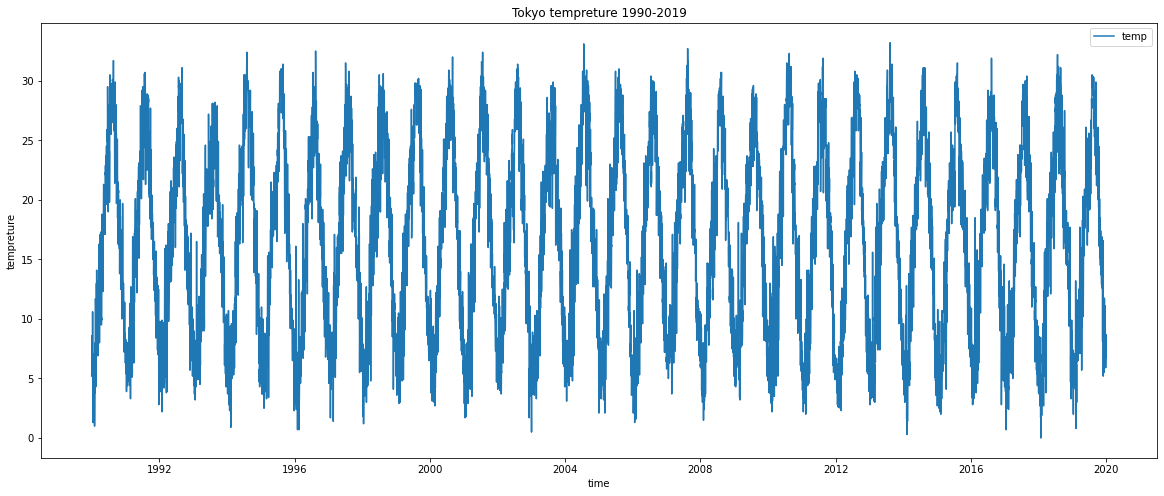

In [5]:
fig = plt.figure(figsize=(20, 8))

plt.title("Tokyo tempreture 1990-2019")
plt.xlabel("time")
plt.ylabel("tempreture")

plt.plot(df["ds"], df["y"], label="temp")
plt.legend()
plt.show()

### 時系列データの分割（ランダムに分割しない）

In [6]:
y_train, y_test = temporal_train_test_split(df, test_size=365)
print(y_train.shape[0], y_test.shape[0])

10592 365


In [7]:
display(y_test.head())
display(y_test.tail())
display(len(y_test))

,ds,y
10593,2019-01-01,5.3
10594,2019-01-02,6.2
10595,2019-01-03,4.9
10596,2019-01-04,5.1
10597,2019-01-05,7.4


,ds,y
10953,2019-12-27,8.7
10954,2019-12-28,6.8
10955,2019-12-29,7.0
10956,2019-12-30,6.7
10957,2019-12-31,8.2


365

### Prophet

In [8]:
model_pro = Prophet(weekly_seasonality=True, yearly_seasonality=True, daily_seasonality=True)

In [9]:
# 学習
model_pro.fit(y_train)

In [10]:
# 予測用の365日のDataFrameの作成
fyear = model_pro.make_future_dataframe(periods=365)

In [11]:
# 予測データの作成
forecast_pro = model_pro.predict(fyear)

In [12]:
display(forecast_pro.head())
display(forecast_pro.tail())
display(len(forecast_pro))

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1990-01-01,7.540975,3.779810,10.061714,7.540975,7.540975,-0.453823,-0.453823,-0.453823,9.377872,...,-0.045784,-0.045784,-0.045784,-9.785910,-9.785910,-9.785910,0.0,0.0,0.0,7.087151
1,1990-01-02,7.540208,3.696837,10.411840,7.540208,7.540208,-0.443570,-0.443570,-0.443570,9.377872,...,0.051658,0.051658,0.051658,-9.873100,-9.873100,-9.873100,0.0,0.0,0.0,7.096637
2,1990-01-03,7.539441,3.590910,10.248582,7.539441,7.539441,-0.550140,-0.550140,-0.550140,9.377872,...,0.029826,0.029826,0.029826,-9.957837,-9.957837,-9.957837,0.0,0.0,0.0,6.989301
3,1990-01-04,7.538674,3.845951,9.903823,7.538674,7.538674,-0.636534,-0.636534,-0.636534,9.377872,...,0.025574,0.025574,0.025574,-10.039981,-10.039981,-10.039981,0.0,0.0,0.0,6.902139
4,1990-01-05,7.537907,3.776221,9.904462,7.537907,7.537907,-0.672509,-0.672509,-0.672509,9.377872,...,0.068977,0.068977,0.068977,-10.119358,-10.119358,-10.119358,0.0,0.0,0.0,6.865398


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
10952,2019-12-27,6.883704,3.818744,10.182074,6.863501,6.900705,0.180890,0.180890,0.180890,9.377872,...,0.068977,0.068977,0.068977,-9.265959,-9.265959,-9.265959,0.0,0.0,0.0,7.064594
10953,2019-12-28,6.883525,3.521352,10.008207,6.863244,6.900690,-0.021039,-0.021039,-0.021039,9.377872,...,-0.033423,-0.033423,-0.033423,-9.365488,-9.365488,-9.365488,0.0,0.0,0.0,6.862486
10954,2019-12-29,6.883345,3.792345,9.827239,6.862988,6.900674,-0.181738,-0.181738,-0.181738,9.377872,...,-0.096828,-0.096828,-0.096828,-9.462782,-9.462782,-9.462782,0.0,0.0,0.0,6.701607
10955,2019-12-30,6.883166,3.829826,10.011632,6.862733,6.900614,-0.225788,-0.225788,-0.225788,9.377872,...,-0.045784,-0.045784,-0.045784,-9.557875,-9.557875,-9.557875,0.0,0.0,0.0,6.657378
10956,2019-12-31,6.882986,3.541878,9.802736,6.862393,6.900552,-0.221240,-0.221240,-0.221240,9.377872,...,0.051658,0.051658,0.051658,-9.650769,-9.650769,-9.650769,0.0,0.0,0.0,6.661747


10957

### sktime ナイーブベイズによる予測

In [13]:
fh = np.arange(len(y_test))+1

In [14]:
# モデルの作成
model_sk = NaiveForecaster(strategy="seasonal_last", sp=365)

In [15]:
# 学習
model_sk.fit(y_train["y"])

NaiveForecaster(sp=365, strategy='seasonal_last')

In [16]:
# 予測データの作成
forecast_sk = model_sk.predict(fh)

### グラフ表示

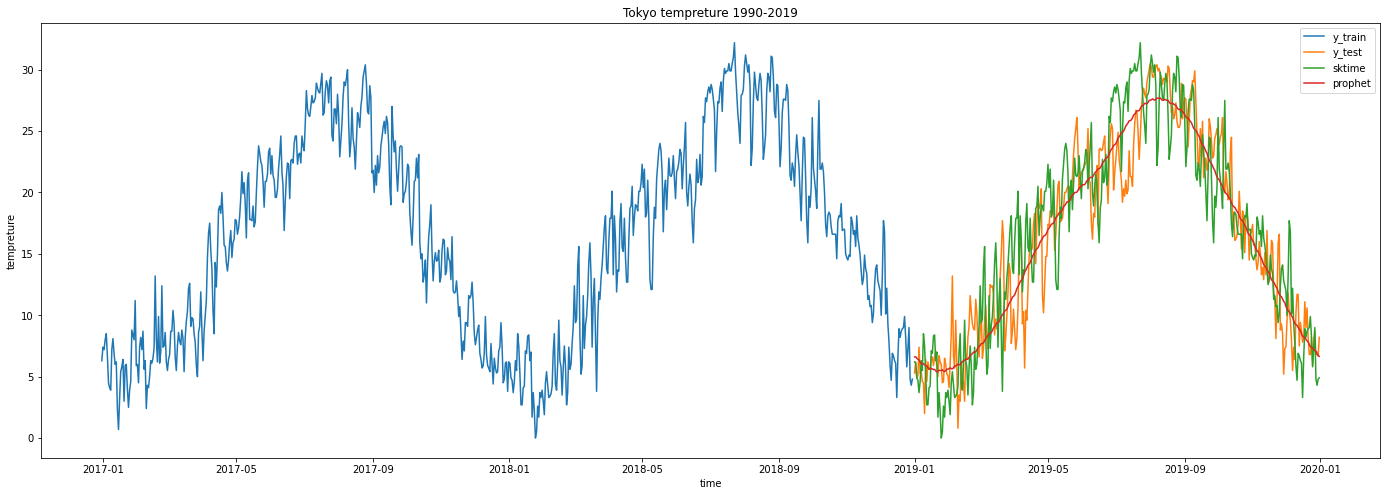

In [17]:
fig = plt.figure(figsize=(24, 8))

plt.plot(y_train["ds"][-731:-1], y_train["y"][-731:-1], label="y_train")
plt.plot(y_test["ds"], y_test["y"], label="y_test")
plt.plot(y_test["ds"], forecast_sk, label="sktime")
plt.plot(y_test["ds"], forecast_pro["yhat"][-366:-1], label="prophet")

plt.title("Tokyo tempreture 1990-2019")
plt.xlabel("time")
plt.ylabel("tempreture")

plt.legend()
plt.show()

In [52]:
print("Prophet の決定係数:{}".format(r2_score(y_test["y"], forecast_pro["yhat"][-366:-1])))

print("sktime の決定係数:{}".format(r2_score(y_test["y"], forecast_sk)))

Prophet の決定係数:0.9015399553586755
sktime の決定係数:0.7408533090595817
